In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('AMZN.csv')
data

Matplotlib is building the font cache; this may take a moment.


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...,...
6511,2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
6512,2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
6513,2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700
6514,2023-04-04,102.750000,104.199997,102.110001,103.949997,103.949997,48662500


In [5]:
data = data[['Date', 'Close']]
data

,Date,Close
0,1997-05-15,0.097917
1,1997-05-16,0.086458
2,1997-05-19,0.085417
3,1997-05-20,0.081771
4,1997-05-21,0.071354
...,...,...
6511,2023-03-30,102.000000
6512,2023-03-31,103.290001
6513,2023-04-03,102.410004
6514,2023-04-04,103.949997


In [10]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
device
# Alternative for non-MAC users
# device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

'mps'

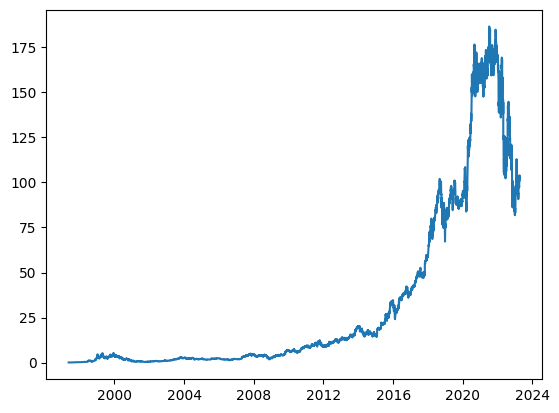

In [12]:
data.loc[:,'Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

In [22]:
def prepare_data_for_lstm(data, look_back):
    temp = data.copy()
    temp.set_index('Date', inplace=True)
    for i in range(1, look_back+1):
        temp[f'Close(t-{i})'] = temp['Close'].shift(i)
    temp.dropna(inplace=True)
    return temp
look_back = 7
shifted_data = prepare_data_for_lstm(data, look_back)
shifted_data

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
1997-05-27,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458,0.097917
1997-05-28,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417,0.086458
1997-05-29,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771,0.085417
1997-05-30,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354,0.081771
1997-06-02,0.075521,0.075000,0.075260,0.076563,0.079167,0.075000,0.069792,0.071354
...,...,...,...,...,...,...,...,...
2023-03-30,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997,100.610001
2023-03-31,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999,98.699997
2023-04-03,102.410004,103.290001,102.000000,100.250000,97.239998,98.040001,98.129997,98.709999


In [23]:
shifted_data = shifted_data.to_numpy()
shifted_data

array([[7.91670000e-02, 7.50000000e-02, 6.97920000e-02, ...,
        8.54170000e-02, 8.64580000e-02, 9.79170000e-02],
       [7.65630000e-02, 7.91670000e-02, 7.50000000e-02, ...,
        8.17710000e-02, 8.54170000e-02, 8.64580000e-02],
       [7.52600000e-02, 7.65630000e-02, 7.91670000e-02, ...,
        7.13540000e-02, 8.17710000e-02, 8.54170000e-02],
       ...,
       [1.02410004e+02, 1.03290001e+02, 1.02000000e+02, ...,
        9.80400010e+01, 9.81299970e+01, 9.87099990e+01],
       [1.03949997e+02, 1.02410004e+02, 1.03290001e+02, ...,
        9.72399980e+01, 9.80400010e+01, 9.81299970e+01],
       [1.01099998e+02, 1.03949997e+02, 1.02410004e+02, ...,
        1.00250000e+02, 9.72399980e+01, 9.80400010e+01]])

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
shifted_data = scaler.fit_transform(shifted_data)
shifted_data

array([[4.46864078e-05, 2.23432039e-05, 0.00000000e+00, ...,
        8.37798446e-05, 8.93615930e-05, 1.50803720e-04],
       [3.07239161e-05, 4.46864078e-05, 2.79248276e-05, ...,
        6.42303205e-05, 8.37798446e-05, 8.93615930e-05],
       [2.37373083e-05, 3.07239161e-05, 5.02679068e-05, ...,
        8.37530351e-06, 6.42303205e-05, 8.37798446e-05],
       ...,
       [5.48736493e-01, 5.53454984e-01, 5.46540607e-01, ...,
        5.25307449e-01, 5.25789999e-01, 5.28899918e-01],
       [5.56993843e-01, 5.48736493e-01, 5.53457476e-01, ...,
        5.21017905e-01, 5.25307449e-01, 5.25789999e-01],
       [5.41712319e-01, 5.56993843e-01, 5.48739012e-01, ...,
        5.37157265e-01, 5.21017905e-01, 5.25307449e-01]])

In [33]:
X = shifted_data[:, 1:,]
y = shifted_data[:, 0]

X.shape, y.shape

((6509, 7), (6509,))

In [34]:
# Need t-7 to t-1 and not the other way round
X = np.flip(X, axis=1).copy()
X

array([[1.50803720e-04, 8.93615930e-05, 8.37798446e-05, ...,
        8.37530351e-06, 0.00000000e+00, 2.23432039e-05],
       [8.93615930e-05, 8.37798446e-05, 6.42303205e-05, ...,
        0.00000000e+00, 2.79248276e-05, 4.46864078e-05],
       [8.37798446e-05, 6.42303205e-05, 8.37530351e-06, ...,
        2.79248276e-05, 5.02679068e-05, 3.07239161e-05],
       ...,
       [5.28899918e-01, 5.25789999e-01, 5.25307449e-01, ...,
        5.37157265e-01, 5.46540607e-01, 5.53454984e-01],
       [5.25789999e-01, 5.25307449e-01, 5.21017905e-01, ...,
        5.46540607e-01, 5.53457476e-01, 5.48736493e-01],
       [5.25307449e-01, 5.21017905e-01, 5.37157265e-01, ...,
        5.53457476e-01, 5.48739012e-01, 5.56993843e-01]])

In [35]:
split_index = int(len(X)*0.95)
split_index

6183

In [36]:
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6183, 7), (326, 7), (6183,), (326,))

In [37]:
X_train = X_train.reshape(-1, look_back, 1)
X_test = X_test.reshape(-1, look_back, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6183, 7, 1), (326, 7, 1), (6183, 1), (326, 1))

In [38]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([6183, 7, 1]),
 torch.Size([326, 7, 1]),
 torch.Size([6183, 1]),
 torch.Size([326, 1]))

In [39]:
from torch.utils.data import Dataset

class StockDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = StockDataset(X_train, y_train)
test_dataset = StockDataset(X_test, y_test)

In [40]:
from torch.utils.data import DataLoader
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [41]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(batch[0].shape, batch[1].shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [44]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(
            input_size, 
            hidden_size, 
            num_layers, 
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        out, (h_n, c_n) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
model = LSTM(1, 4, 1).to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [45]:
lr = 0.001
num_epochs = 10
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training
for epoch in range(num_epochs):
    model.train()
    for _, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
    print(f'Epoch: {epoch}, Loss: {loss.item()}')

# Evaluation
model.eval()
running_loss = 0.0
for _, batch in enumerate(test_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    with torch.no_grad():
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        running_loss += loss.item()
    print(f'Loss: {loss.item()}')
print(f'Average Loss: {running_loss/len(test_loader)}')

Epoch: 0, Loss: 0.0001106366835301742
Epoch: 1, Loss: 3.541749174473807e-05
Epoch: 2, Loss: 4.576851279125549e-05
Epoch: 3, Loss: 0.00015166097728069872
Epoch: 4, Loss: 6.845681491540745e-05
Epoch: 5, Loss: 0.00023106750450097024
Epoch: 6, Loss: 8.527331374352798e-05
Epoch: 7, Loss: 1.645736483624205e-05
Epoch: 8, Loss: 6.707363354507834e-05
Epoch: 9, Loss: 1.0536957233853173e-05
Loss: 0.00014187084161676466
Loss: 0.0012358094099909067
Loss: 0.001016237773001194
Loss: 0.00127799017354846
Loss: 0.0006547829252667725
Loss: 0.002217855304479599
Loss: 0.001297863433137536
Loss: 0.0016675220103934407
Loss: 0.0004999226657673717
Loss: 0.001023485092446208
Loss: 0.0006121929618529975
Loss: 0.0007931238505989313
Loss: 0.0007291806396096945
Loss: 0.0019919699989259243
Loss: 0.00048725708620622754
Loss: 0.00031866063363850117
Loss: 0.0003268419823143631
Loss: 0.00046395836398005486
Loss: 0.0002406760468147695
Loss: 0.00015259279462043196
Loss: 0.00010522369848331437
Average Loss: 0.0008216675088

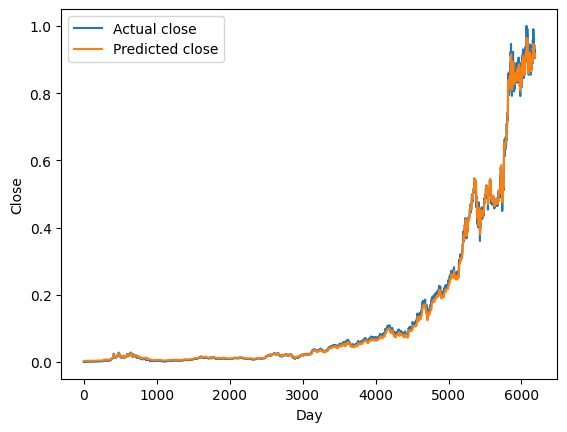

In [46]:
with torch.no_grad():
    predicted = model(X_train.to(device)).cpu().numpy()

plt.plot(y_train, label='Actual close')
plt.plot(predicted, label='Predicted close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [47]:
# To get back the actual values

train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], look_back+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dummies[:, 0].copy()
train_predictions

array([  0.61710201,   0.61672406,   0.61642392, ..., 170.16834139,
       169.12882786, 169.20193941])

In [48]:
dummies = np.zeros((X_train.shape[0], look_back+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dummies[:, 0].copy()
new_y_train

array([7.91669998e-02, 7.65630002e-02, 7.52599999e-02, ...,
       1.69091511e+02, 1.73315006e+02, 1.68870998e+02])

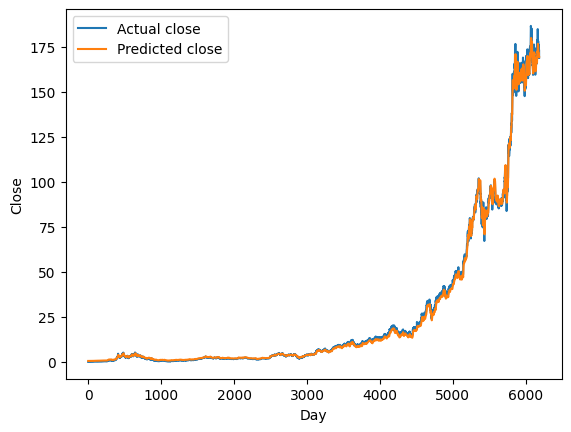

In [49]:
plt.plot(new_y_train, label='Actual close')
plt.plot(train_predictions, label='Predicted close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [50]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()
dummies = np.zeros((X_test.shape[0], look_back+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dummies[:, 0].copy()
test_predictions

array([168.58731105, 168.27372174, 167.47948819, 167.4928388 ,
       167.8220242 , 168.17034065, 168.15097615, 168.27676759,
       168.06008972, 167.69018552, 166.93240213, 167.07705784,
       166.78262183, 165.7942208 , 164.62614789, 163.52963025,
       162.47938955, 162.57770163, 162.92641827, 162.43702553,
       162.07384665, 161.06872679, 159.5488358 , 157.19639356,
       153.11629768, 150.01040739, 146.79413277, 144.1295241 ,
       142.50052715, 142.64368217, 144.62665374, 147.05743217,
       148.92050392, 147.41936603, 149.71678286, 152.29724155,
       155.23086338, 157.51809772, 158.58626893, 157.72411511,
       156.88797331, 156.42833876, 156.60635433, 156.17121999,
       155.27916346, 153.92141404, 151.4923364 , 150.85121801,
       151.37679413, 152.13707867, 152.30112112, 152.48417234,
       151.61354794, 150.11517801, 146.83280619, 143.53270396,
       141.7485131 , 142.61973778, 143.7967148 , 144.07147506,
       145.36256035, 147.85172131, 150.9573337 , 154.38

In [51]:
dummies = np.zeros((X_test.shape[0], look_back+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dummies[:, 0].copy()
new_y_test

array([170.01750505, 167.07899207, 170.41701182, 171.03699821,
       171.06850166, 169.66949984, 170.66099119, 169.20100565,
       168.64450413, 166.71699151, 170.40449492, 167.52200783,
       164.35699022, 163.25400293, 162.55400179, 161.48599732,
       165.36199892, 165.2070051 , 161.21400501, 162.13799851,
       158.91749972, 156.29900124, 151.66749509, 142.64300408,
       144.54400445, 139.9859878 , 138.87249566, 139.63749349,
       143.97799855, 149.57350556, 151.19349835, 150.61250774,
       138.84550541, 157.63949825, 157.93550165, 161.41349717,
       161.18949369, 159.003495  , 153.29350176, 155.16701166,
       156.51049894, 158.10048897, 154.6524962 , 152.60150432,
       150.19749381, 144.82699073, 151.35799656, 153.78849709,
       153.56300403, 151.14199678, 152.05250627, 147.89849848,
       145.6410112 , 137.45300661, 136.01449765, 139.27900567,
       146.81751023, 145.52450183, 141.8529947 , 147.36649717,
       153.10400311, 157.23900213, 161.25049965, 161.49

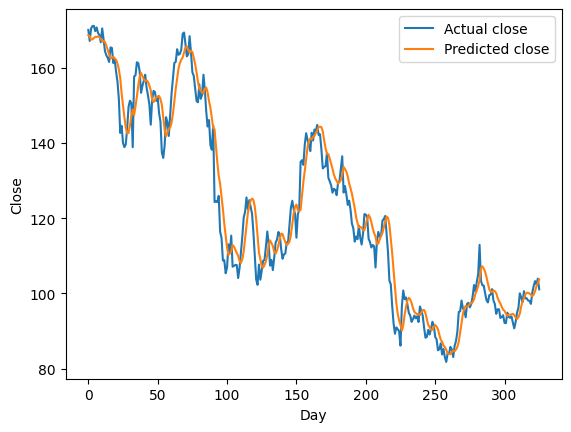

In [52]:
plt.plot(new_y_test, label='Actual close')
plt.plot(test_predictions, label='Predicted close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()